In [2]:
# Can perfrom statitsticl test and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Hodrick–Prescott filter

- Separate cyclical cycle and trend from data by minimizing a cost function, quarterly data have default of 1600 and annual data has 6.25 default.
- The lambda value selection has been questioned in terms of reliastic representation of data, as well the whole model in later publicatios

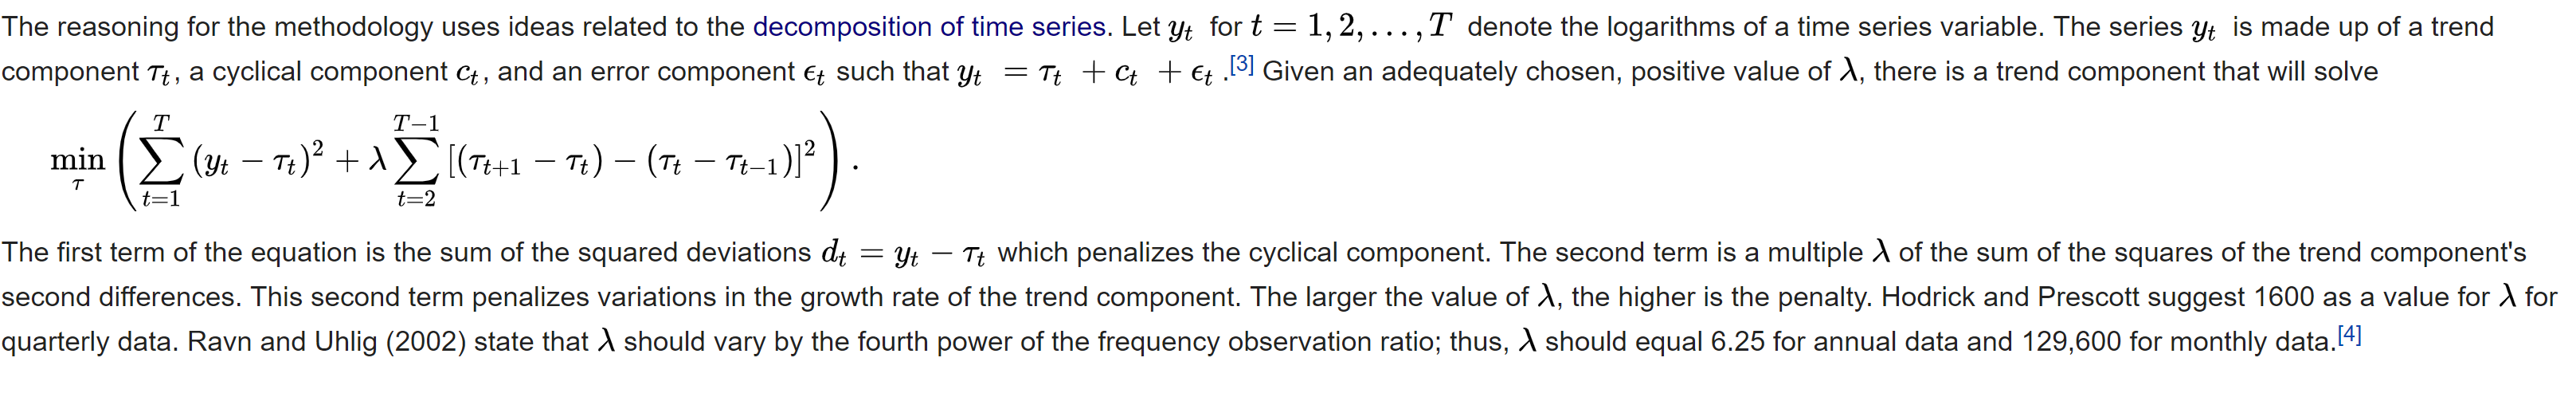

In [1]:
from IPython.display import Image
Image("img/horick_prescott.png")

In [6]:
df = pd.read_csv("J/UDEMY-TSA-FINAL/Data/macrodata.csv", index_col='Unnamed: 0', parse_dates=True)

In [7]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


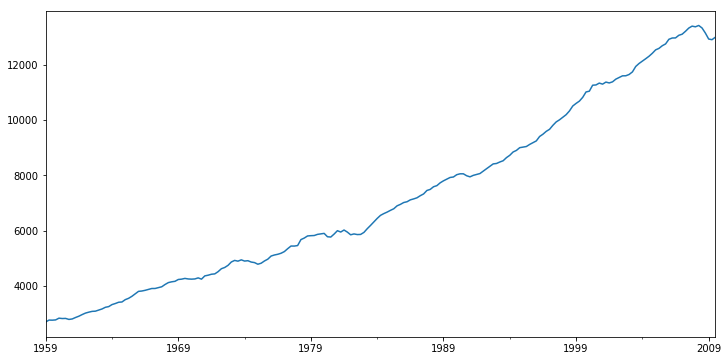

In [8]:
df['realgdp'].plot(figsize=(12,6))

In [9]:
#tsa time series analysis
from statsmodels.tsa.filters.hp_filter import hpfilter

In [11]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)  #quarterly return tuple of cycle and trend

In [14]:
df['gdp_trend'] = gdp_trend
df['gdp_cycle'] = gdp_cycle

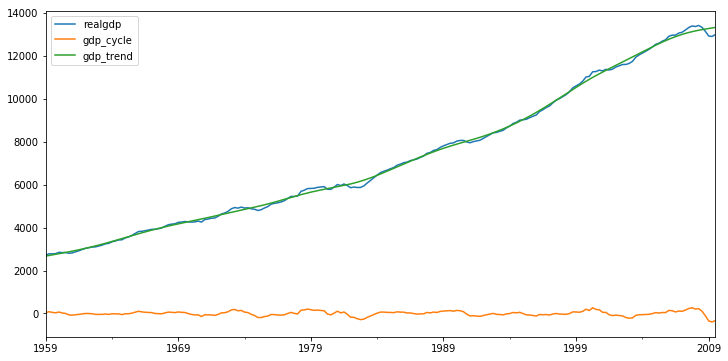

In [15]:
df[['realgdp', 'gdp_cycle', 'gdp_trend']].plot(figsize=(12,6))

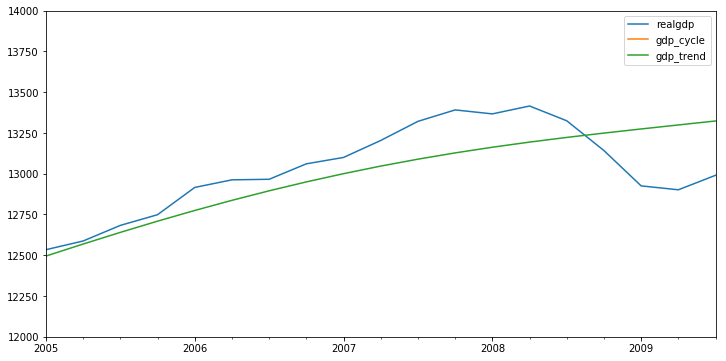

In [18]:
df[['realgdp', 'gdp_cycle', 'gdp_trend']]['2005-01-01':].plot(figsize=(12,6), ylim=[12000,14000])

In [29]:
df[(df['realgdp'] < df['gdp_trend']) & (df['year']>2004)]

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,gdp_trend,gdp_cycle
2008-12-31,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91,13249.189472,-107.269472
2009-03-31,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71,13274.457706,-349.047706
2009-06-30,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19,13299.061073,-397.557073
2009-09-30,2009,3,12990.341,9256.0,1486.398,1044.088,10040.6,216.385,1673.9,0.12,9.6,308.013,3.56,-3.44,13323.456243,-333.115243


## ETS (Error Trend Seasonality) and decomposition


In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [31]:
df = pd.read_csv("J/UDEMY-TSA-FINAL/Data/airline_passengers.csv", index_col='Month', parse_dates=True)

In [32]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


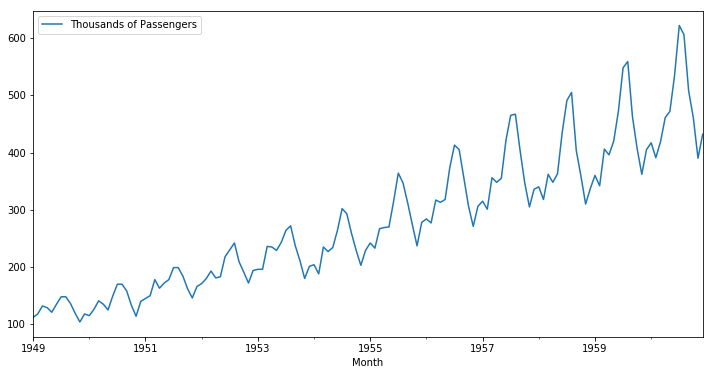

In [34]:
df.plot(figsize=(12,6))

In [36]:
df.isnull().sum()

Thousands of Passengers    0
dtype: int64

In [39]:
result = seasonal_decompose(df['Thousands of Passengers'])

In [40]:
result  #object

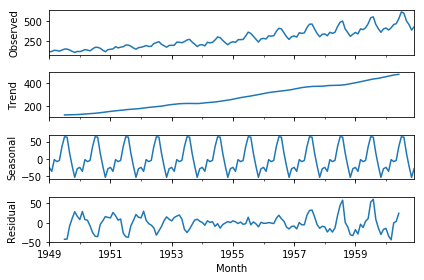

In [55]:
result.plot();   #.trend .seasonal .resid

In [45]:
df['trend_add'] = result.trend
df['seasonal_add'] = result.seasonal
df['residual_add'] = result.resid

In [46]:
result2 = seasonal_decompose(df['Thousands of Passengers'], model='multiplicative')

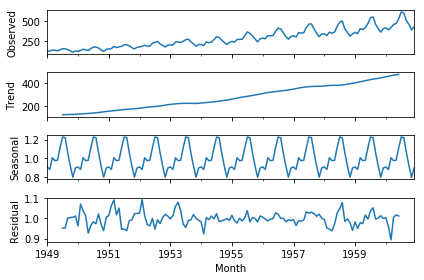

In [54]:
result2.plot();

In [47]:
df['trend_multi'] = result2.trend
df['seasonal_multi'] = result2.seasonal
df['residual_multi'] = result2.resid

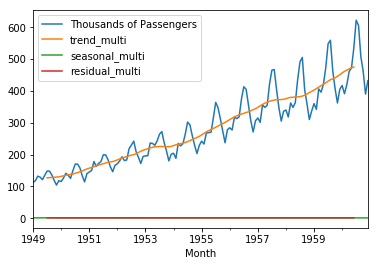

In [49]:
df[['Thousands of Passengers', 'trend_multi', 'seasonal_multi', 'residual_multi']].plot()

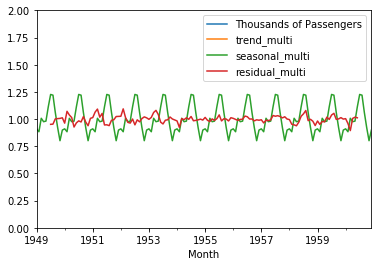

In [53]:
df[['Thousands of Passengers', 'trend_multi', 'seasonal_multi', 'residual_multi']].plot(ylim=[0,2])

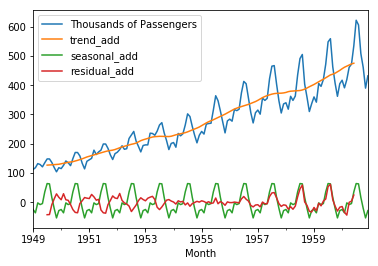

In [50]:
df[['Thousands of Passengers', 'trend_add', 'seasonal_add', 'residual_add']].plot()

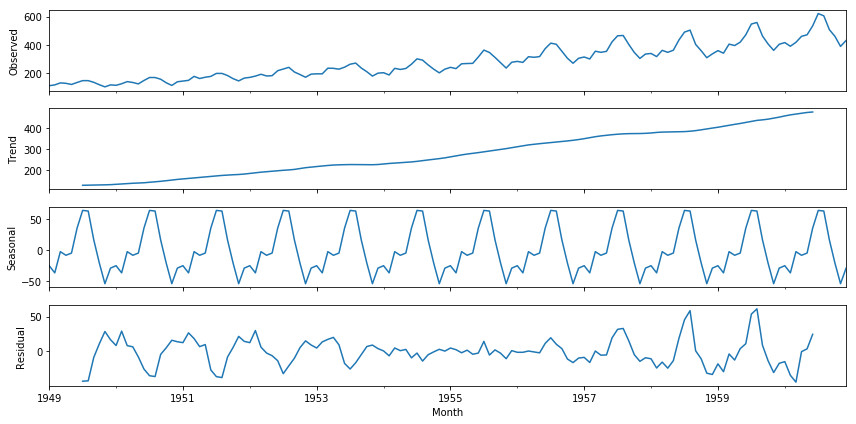

In [57]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,6

result.plot();

In [ ]:
# Weighted moving average y_t+1_hat = alpha * (1-alpha)^0 * y_t + alpha * (1-alpha)^1 * y_t-1 + alpha * (1-alpha)^2 * y_t-2 +..
# y_t+1_hat = alpha * (1-alpha)^0 * y_t + (1-alpha) * (alpha * y_t-1 + alpha * (1-alpha)^1 * y_t-2 +..)
# y_t+1_hat = alpha * (1-alpha)^0 * y_t + (1-alpha) * y_t_hat
# help to reduce past time impact less, alpha small (even weights), alpha large (more recent time)

# exponential smoothing, exponential moving average

In [58]:
df['Thousands of Passengers'].index  #monthly

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [59]:
df['simple_rolling_6month'] = df['Thousands of Passengers'].rolling(6).mean()
df['simple_rolling_12month'] = df['Thousands of Passengers'].rolling(12).mean()

## Exponential weighted moving average, span == N-day exponential movig average

In [60]:
df['exponential_weighted_moving_average_6span'] = df['Thousands of Passengers'].ewm(span=6).mean()
df['exponential_weighted_moving_average_12span'] = df['Thousands of Passengers'].ewm(span=12).mean()

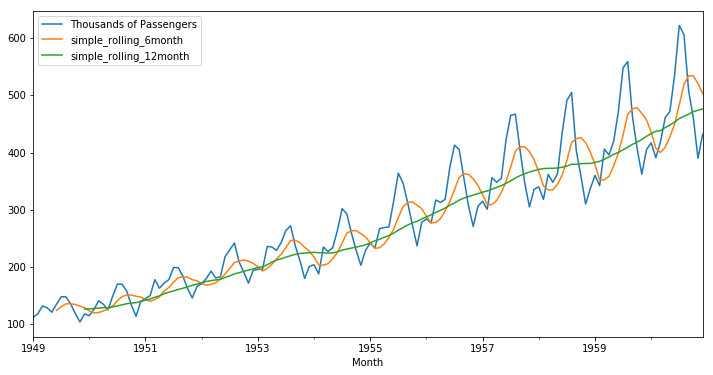

In [61]:
# has lag at the beginning
df[['Thousands of Passengers', 'simple_rolling_6month', 'simple_rolling_12month']].plot(figsize=(12,6))

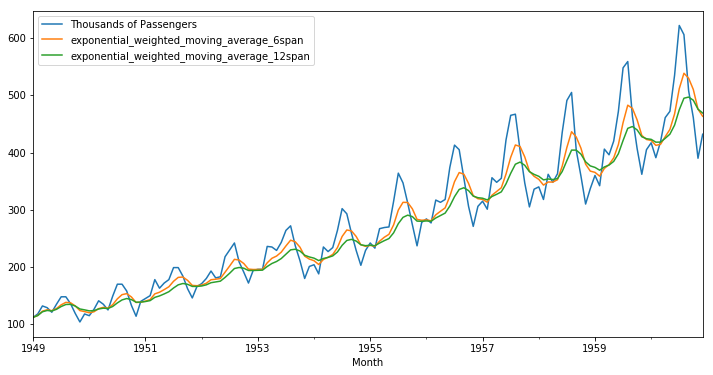

In [62]:
# no lag at the beginning , peaks are aligned
df[['Thousands of Passengers', 'exponential_weighted_moving_average_6span', 'exponential_weighted_moving_average_12span']].plot(figsize=(12,6))

## Holt Winter

In [65]:
df = pd.read_csv("J/UDEMY-TSA-FINAL/Data/airline_passengers.csv", index_col='Month', parse_dates=True)

In [66]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [68]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [69]:
df.index.freq = 'MS' #calender month beginning

In [70]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [71]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

In [72]:
span = 12
alpha = 2/(span + 1)

In [73]:
df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha, adjust=False).mean()

In [75]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])

In [76]:
fitted_model = model.fit(smoothing_level=alpha, optimized=False)

In [78]:
df['simple_smoothing'] = fitted_model.fittedvalues.shift(-1)  #optimize false need to shift back

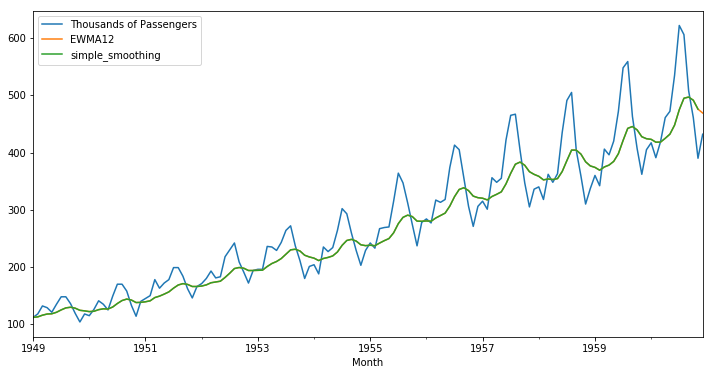

In [81]:
df.plot()

In [82]:
df.tail()

,Thousands of Passengers,EWMA12,simple_smoothing
Month,,,
1960-08-01,606,494.898619,494.898619
1960-09-01,508,496.914216,496.914216
1960-10-01,461,491.388952,491.388952
1960-11-01,390,475.790652,475.790652
1960-12-01,432,469.053629,NaN


In [83]:
fitted_model.predict(start='1961-01-01', end='1963-01-01')   # only level, simple holt

C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


1961-01-01    469.053629
1961-02-01    469.053629
1961-03-01    469.053629
1961-04-01    469.053629
1961-05-01    469.053629
1961-06-01    469.053629
1961-07-01    469.053629
1961-08-01    469.053629
1961-09-01    469.053629
1961-10-01    469.053629
1961-11-01    469.053629
1961-12-01    469.053629
1962-01-01    469.053629
1962-02-01    469.053629
1962-03-01    469.053629
1962-04-01    469.053629
1962-05-01    469.053629
1962-06-01    469.053629
1962-07-01    469.053629
1962-08-01    469.053629
1962-09-01    469.053629
1962-10-01    469.053629
1962-11-01    469.053629
1962-12-01    469.053629
1963-01-01    469.053629
Freq: MS, dtype: float64

In [84]:
test = fitted_model.predict(start='1961-01-01', end='1963-01-01')

C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


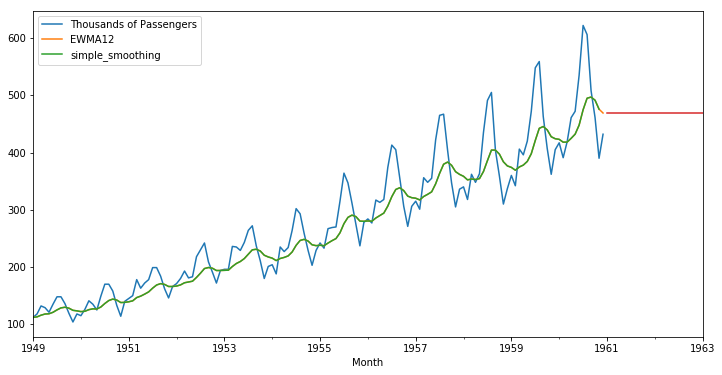

In [87]:
df.plot()
test.plot(label='test')


## Double (trend) and triple (seasonality) smoothing using Exponential smoothing

In [90]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [98]:
model2 = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit()

In [99]:
test2 = model2.predict(start='1961-01-01', end='1963-01-01')

C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [91]:
df['exp_smooth_add_trend'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)

In [101]:
model3 = ExponentialSmoothing(df['Thousands of Passengers'], trend='add', seasonal='mul',seasonal_periods=12).fit()
test3 = model3.predict(start='1961-01-01', end='1963-01-01')

C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [92]:
df['exp_smooth_add_trend_sea_mul'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add', seasonal='mul',seasonal_periods=12).fit().fittedvalues.shift(-1)

In [93]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'simple_smoothing',
       'exp_smooth_add_trend', 'exp_smooth_add_trend_sea_mul'],
      dtype='object')

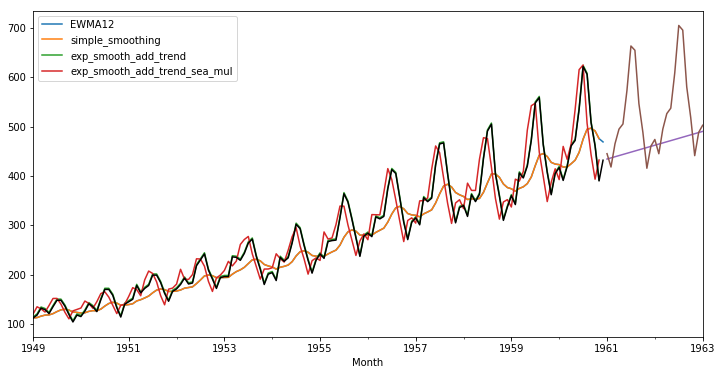

In [103]:
df[['EWMA12', 'simple_smoothing',
       'exp_smooth_add_trend', 'exp_smooth_add_trend_sea_mul']].plot()
df['Thousands of Passengers'].plot(color='black')
test2.plot(label = 'add_trend')
test3.plot(label = 'add_trend_multi_seasonal')

In [104]:
test3 = model3.predict(start='1961-01-01', end='1963-01-01')

C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [105]:
test3

1961-01-01    445.242339
1961-02-01    418.225242
1961-03-01    465.309418
1961-04-01    494.951027
1961-05-01    505.475617
1961-06-01    573.312228
1961-07-01    663.595874
1961-08-01    654.903465
1961-09-01    546.760601
1961-10-01    488.446640
1961-11-01    415.723357
1961-12-01    460.377698
1962-01-01    474.070877
1962-02-01    445.159152
1962-03-01    495.115611
1962-04-01    526.487619
1962-05-01    537.512693
1962-06-01    609.457883
1962-07-01    705.214984
1962-08-01    695.763854
1962-09-01    580.697350
1962-10-01    518.607909
1962-11-01    441.262590
1962-12-01    488.516139
1963-01-01    502.899416
Freq: MS, dtype: float64

In [106]:
model3.forecast(25)

C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


1961-01-01    445.242339
1961-02-01    418.225242
1961-03-01    465.309418
1961-04-01    494.951027
1961-05-01    505.475617
1961-06-01    573.312228
1961-07-01    663.595874
1961-08-01    654.903465
1961-09-01    546.760601
1961-10-01    488.446640
1961-11-01    415.723357
1961-12-01    460.377698
1962-01-01    474.070877
1962-02-01    445.159152
1962-03-01    495.115611
1962-04-01    526.487619
1962-05-01    537.512693
1962-06-01    609.457883
1962-07-01    705.214984
1962-08-01    695.763854
1962-09-01    580.697350
1962-10-01    518.607909
1962-11-01    441.262590
1962-12-01    488.516139
1963-01-01    502.899416
Freq: MS, dtype: float64

In [ ]:
# similar forcast (need time interval count), predict (time span)

In [107]:
df2 = pd.read_csv("J/UDEMY-TSA-FINAL/Data/samples.csv", index_col=0, parse_dates=True)

In [108]:
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


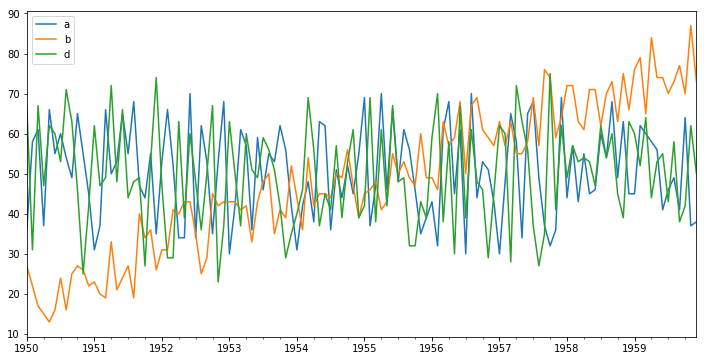

In [110]:
df2[['a', 'b', 'd']].plot()

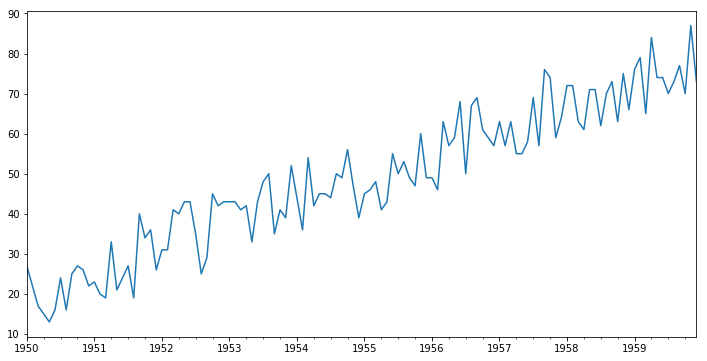

In [114]:
df2['b'].plot()

In [115]:
df['b_pandas_shift1'] = df2['b'] - df2['b'].shift(1)

In [120]:
from statsmodels.tsa.statespace.tools import diff

df['b_pandas_diff1'] = diff(df2['b'], k_diff=1)

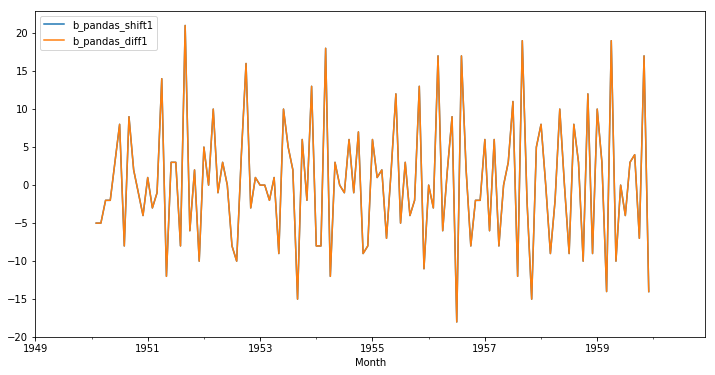

In [121]:
df[['b_pandas_shift1', 'b_pandas_diff1']].plot()

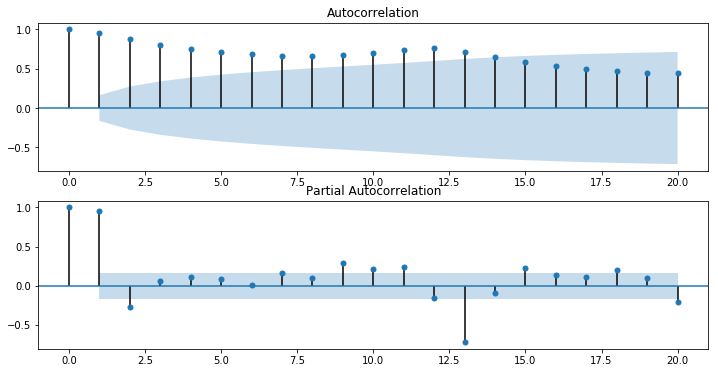

In [123]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(df['Thousands of Passengers'].dropna(), ax=ax[0], lags=20)
ax[1] = plot_pacf(df['Thousands of Passengers'].dropna(), ax=ax[1], lags=20)


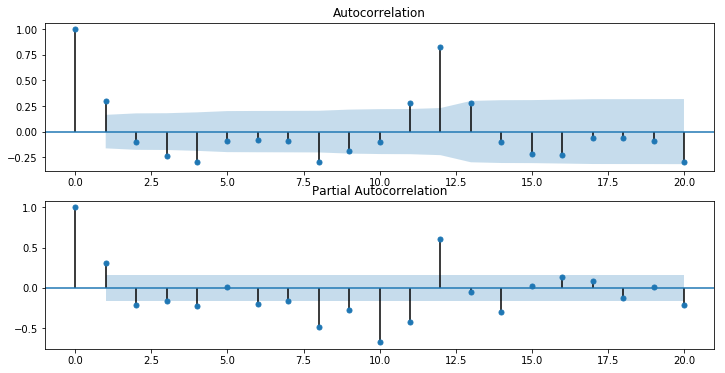

In [124]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf   # 1differencing 1AR,1 d 1MA? 1 D seasonal ?

fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(diff(df['Thousands of Passengers'], k_diff=1).dropna(), ax=ax[0], lags=20)
ax[1] = plot_pacf(diff(df['Thousands of Passengers'], k_diff=1).dropna(), ax=ax[1], lags=20)

C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


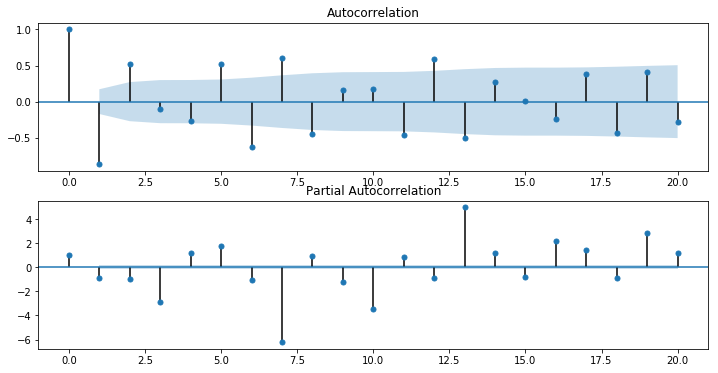

In [125]:
fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(diff(df['Thousands of Passengers'], k_diff=1, k_seasonal_diff=12).dropna(), ax=ax[0], lags=20)
ax[1] = plot_pacf(diff(df['Thousands of Passengers'], k_diff=1, k_seasonal_diff=12).dropna(), ax=ax[1], lags=20)

In [ ]:
# ACF lag= x calculate correlation between y and y.shift(x) , create the acf at lag x
# PACF calculate correlation at lag x (y, y.shift(x), find the residual (error) of that fit, correlat the error vs. y.sfit(x+x)
# again find residual of that fit then correlate it with y.shift(x+x+x)

In [127]:
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

In [130]:
df1 = pd.read_csv('J/UDEMY-TSA-FINAL/Data/airline_passengers.csv', index_col='Month', parse_dates=True)

In [132]:
df1.index.freq = 'MS'

In [134]:
df2 = pd.read_csv('J/UDEMY-TSA-FINAL/Data/DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df2.index.freq = 'D'

In [136]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [137]:
import warnings
warnings.filterwarnings('ignore')

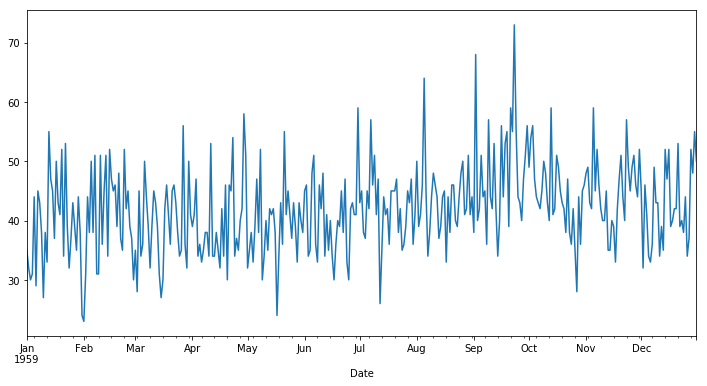

In [150]:
df2['Births'].plot()

<BarContainer object of 25 artists>

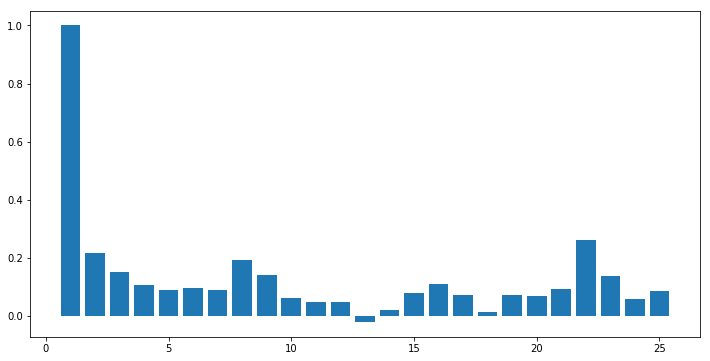

In [149]:
plt.bar(np.arange(1, 26, 1), acf(df2['Births'], nlags=24))

<BarContainer object of 25 artists>

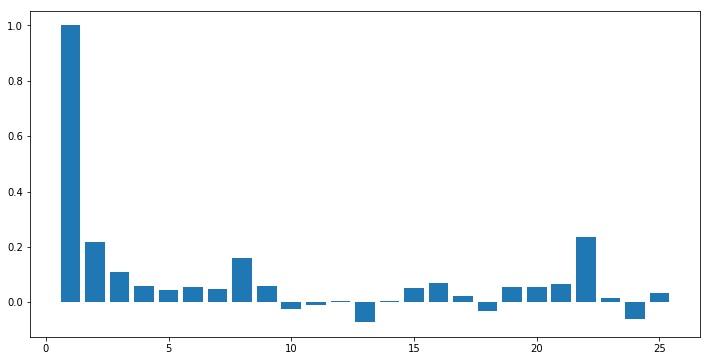

In [146]:
plt.bar(np.arange(1, 26, 1), pacf_yw(df2['Births'], nlags=24,method='unbiased'))

In [151]:
from pandas.plotting import lag_plot

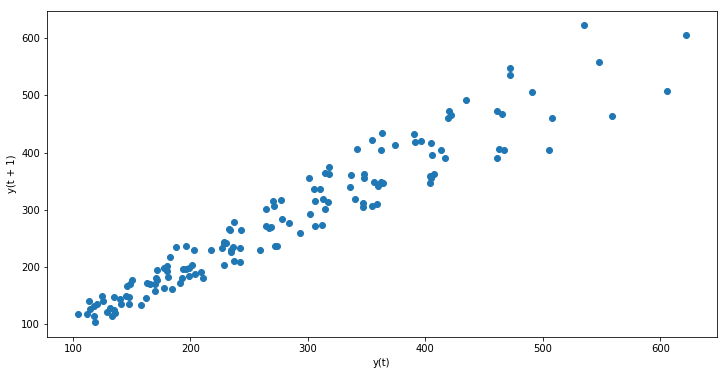

In [153]:
lag_plot(df1['Thousands of Passengers'], lag=1) # strong auto correlation with 1 lag

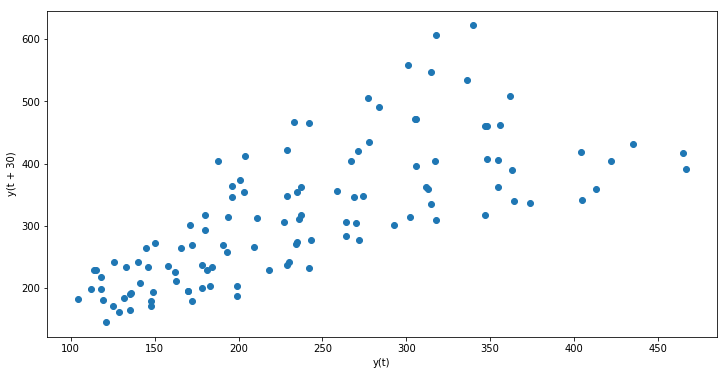

In [157]:
lag_plot(df1['Thousands of Passengers'], lag=30)

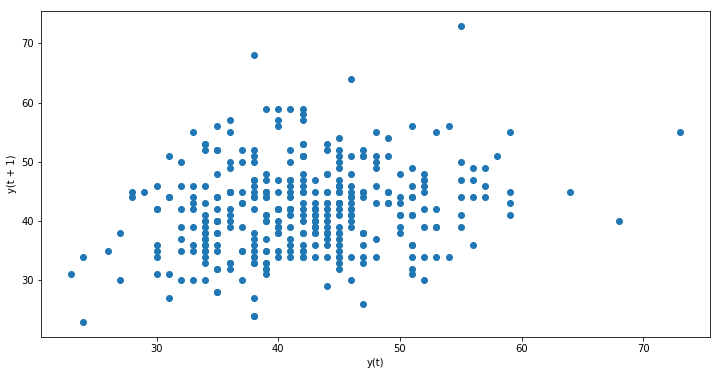

In [158]:
lag_plot(df2['Births'], lag=1) # not much correlation lag=1

In [159]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

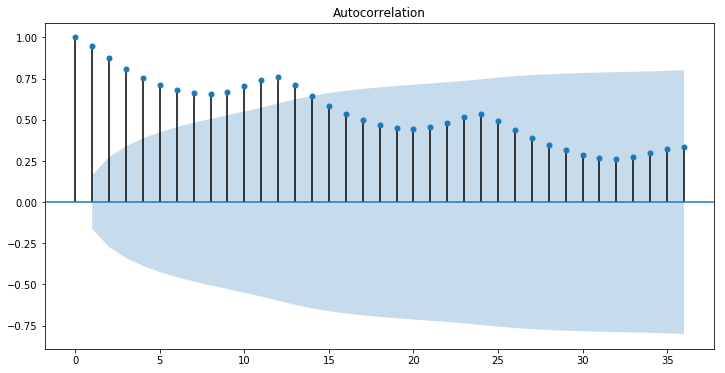

In [163]:
plot_acf(df1['Thousands of Passengers'], lags=36); #shaded area 95% confidence interval

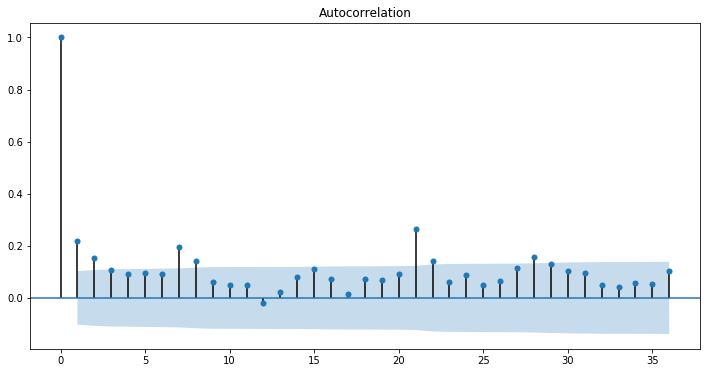

In [164]:
plot_acf(df2['Births'], lags=36); # acf for a stationary data, sudden drop

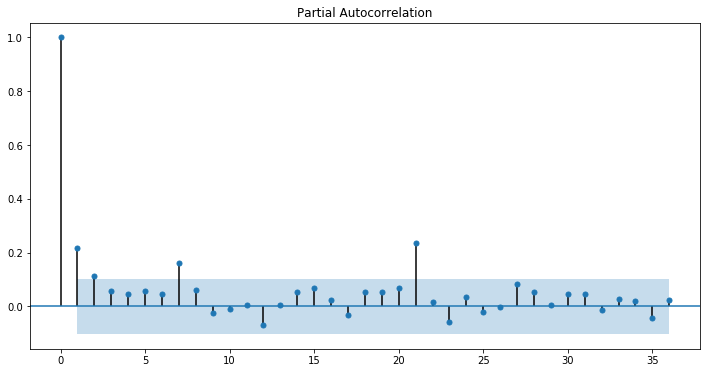

In [165]:
# pacf works best on a data that is already stationary
plot_pacf(df2['Births'], lags=36);

In [ ]:
# stock price even though is function of time, has time only as one variable. future stock prices depend on so many other factors
# that knowing the past values is not enough to to forcase it. So ARIMA will not be solely appropriate.
# in comparison to airline sale, and seasonnality, still impact of new jet engine can not be understood from the past and impact on sale 

# Stationary or Non-stationary

mean, variance, co-variance in time is constant, **Augmented Dickey-Fuller test**

In [166]:
from statsmodels.tsa.ar_model import AR, ARResults

In [167]:
df = pd.read_csv('J/UDEMY-TSA-FINAL/Data/uspopulation.csv', index_col='DATE', parse_dates=True)

In [168]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


In [170]:
df.index.freq = 'MS'

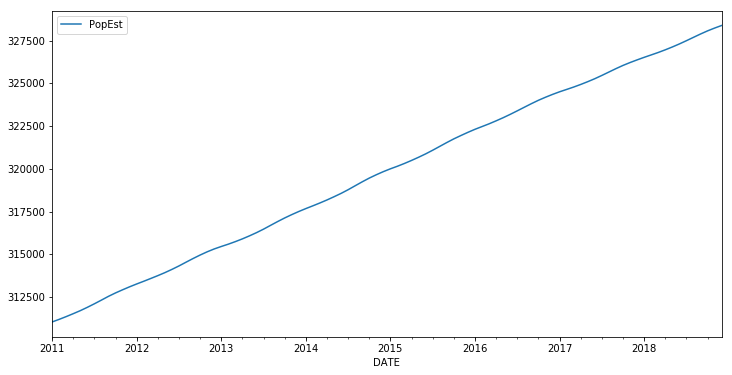

In [171]:
df.plot()

In [172]:
model = AR(df['PopEst'])

In [173]:
AR1fit = model.fit(maxlag=1)

In [174]:
AR1fit.k_ar

1

In [175]:
AR1fit.aic

6.386632335775172

In [176]:
AR1fit.params

const        441.553734
L1.PopEst      0.999190
dtype: float64

In [180]:
df.shape

(96, 1)

In [187]:
from sklearn.metrics import mean_squared_error
for lag_count in np.arange(1, 20, 1):
    model = AR(df['PopEst'].iloc[0:90])
    ar_fit = model.fit(maxlag=lag_count)
    y_pred = ar_fit.predict(start=89, end=95)
    print(lag_count, ar_fit.aic, ' ', ar_fit.bic, '', mean_squared_error(df['PopEst'].iloc[89:97], y_pred)) #14?

1 6.423307789452789   6.507194408657243  1735.1526068921683
2 5.04145347346532   5.154059692305238  1947.8799577674847
3 3.798010541605177   3.9397293989991184  328.29456078582876
4 3.801423883696557   3.9726574159933135  406.590815372312
5 3.6911607403309934   3.8923202555713727  1413.191328594489
6 3.6794006439474023   3.9109070057420037  855.8743428180176
7 3.7038797004558117   3.9661636217831537  584.0002287010464
8 3.5230812130500615   3.816583560277409  32.49064439364812
9 3.501157179063286   3.8263292864879386  132.32944284498654
10 3.447772325489184   3.8050763206902665  118.11200335658711
11 3.4883520007719873   3.8782611410513708  122.30926012585867
12 3.2629647618459585   3.6859637820210134  273.3164183744305
13 3.1390779720269353   3.595663443816614  3.4132249075858203
14 3.0849553825563456   3.5756360857745206  256.775235050033
15 3.1278296146515223   3.6531269203864194  324.50898035332375
16 3.0985817331851244   3.659029999099652  384.02956907562964
17 3.1146479763534947 

In [190]:
model = AR(df['PopEst'].iloc[0:90])
ARfit = model.fit(ic='t-stat')

In [191]:
ARfit.params

const         87.531521
L1.PopEst      2.305462
L2.PopEst     -2.119997
L3.PopEst      1.436714
L4.PopEst     -1.285608
L5.PopEst      1.142306
L6.PopEst     -1.041450
L7.PopEst      1.129062
L8.PopEst     -0.927874
L9.PopEst      0.894343
L10.PopEst    -1.132644
L11.PopEst     1.063705
L12.PopEst    -0.464278
dtype: float64

## Dicky-Fuller stationary test

In [203]:
from statsmodels.tsa.stattools import adfuller, kpss

In [ ]:
#null == data is non-stationary, data has unit root

In [204]:
kpss(df2['Births'])

(1.1169905678533985,
 0.01,
 17,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

In [202]:
adfuller(df2['Births']) # data initially was stationary, p_value<<0.05, reject the null => data is stationary

(-4.808291253559765,
 5.2434129901498554e-05,
 6,
 358,
 {'1%': -3.448748905151901,
  '10%': -2.5710891239349585,
  '5%': -2.8696473721448728},
 2343.8290926464197)

In [206]:
kpss(df1['Thousands of Passengers'])

(1.0521750110135093,
 0.01,
 14,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

In [201]:
adfuller(df1['Thousands of Passengers']) #p-value>>0.05, fail to reject null ("accept null"), data is non-stationary

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 996.692930839019)

In [199]:
adfuller(df1['Thousands of Passengers'])  #autolag='AIC' default, bic, t-stat
# return
'''
adf: test statistics
pvalue
usedlag
nobs: number of observation
critical values: critical values for t-statistics at 1%, 5%, 10%
ic_best: maximized information criteria, autolag is not none
'''

'\nadf: test statistics\npvalue\nusedlag\nnobs: number of observation\ncritical values: critical values for t-statistics at 1%, 5%, 10%\nic_best: maximized information criteria, autolag is not none\n'

## Causality test (beyond just correation, it is about reasons)

In [208]:
from statsmodels.tsa.stattools import grangercausalitytests

In [209]:
df3 = pd.read_csv("J/UDEMY-TSA-FINAL/Data/samples.csv", index_col=0, parse_dates=True)

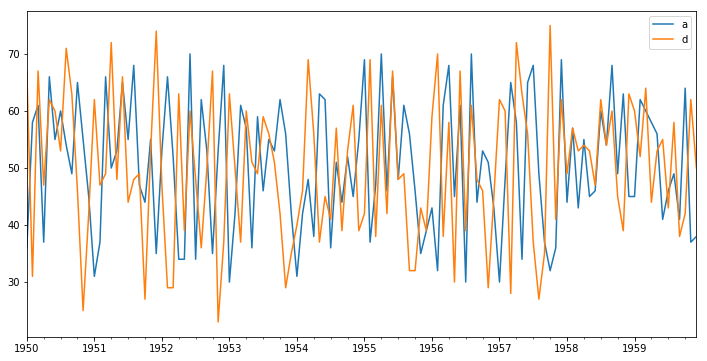

In [214]:
df3[['a', 'd']].plot()

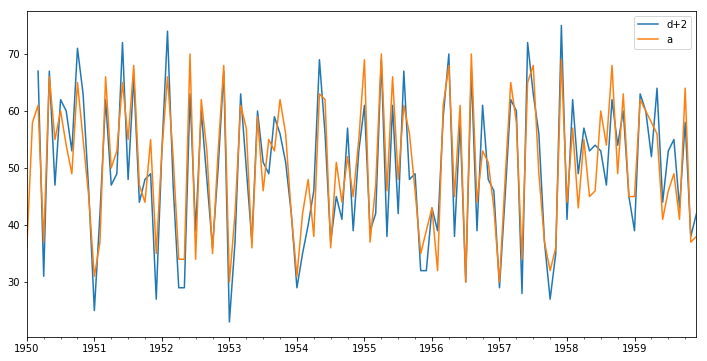

In [220]:
(df3['d'].shift(2)).plot(legend=True, label='d+2') # it seems the data in d is impacting 2 days later on data from a
df3['a'].plot(legend=True)

In [212]:
grangercausalitytests(df3[['a', 'd']], maxlag=5) # the p-value drop to below 0.05 shows there is causality with lag2
# null is no-causality, reject null => causality when p-value<<0.05
# check enough lag to make sure nothing is going on


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=136.1258, p=0.0000  

{1: ({'lrtest': (1.7364915553187075, 0.18758398456227507, 1),
   'params_ftest': (1.7051251051681153, 0.1942027811635669, 116.0, 1.0),
   'ssr_chi2test': (1.7492231682328023, 0.18597442074424264, 1),
   'ssr_ftest': (1.7051251051681098, 0.1942027811635688, 116.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (212.65135382912013, 6.658022084670888e-47, 2),
   'params_ftest': (286.0339426255599, 6.025362015681849e-45, 113.0, 2.0),
   'ssr_chi2test': (597.3806235365698, 1.907417667905223e-130, 2),
   'ssr_ftest': (286.033942625561, 6.025362015680817e-45, 113.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (212.4788575746154, 8.480665715595584e-46, 3),
   'params_ftest': (188.7446232861611, 3.228848294147767e-43, 110.0, 3.0),
   'ssr_chi2test': (602.266934304027, 3.250504587468671e-130, 3),
   'ssr_ftest': (188.74462328616232, 3.2288482941468295e-43, 110.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
  

In [213]:
# compare with data that don't have causality
grangercausalitytests(df3[['b', 'd']], maxlag=5) # no causality, p-value is high


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7084  , p=0.5879  

{1: ({'lrtest': (1.5517414581131561, 0.21287853854122682, 1),
   'params_ftest': (1.5225271098609752, 0.2197316060388221, 116.0, 1.0),
   'ssr_chi2test': (1.5619028109780992, 0.21138682952677562, 1),
   'ssr_ftest': (1.5225271098610045, 0.2197316060388175, 116.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (0.9051081656513134, 0.636001674473408, 2),
   'params_ftest': (0.4350444134913966, 0.6483153418342347, 113.0, 2.0),
   'ssr_chi2test': (0.9085883326014835, 0.6348959407829953, 2),
   'ssr_ftest': (0.43504441349138834, 0.6483153418342387, 113.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (1.6895254112311022, 0.6392650421085297, 3),
   'params_ftest': (0.5333223212193078, 0.6603817798496421, 110.0, 3.0),
   'ssr_chi2test': (1.7017830431634937, 0.6365374570974169, 3),
   'ssr_ftest': (0.5333223212193285, 0.6603817798496251, 110.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0.

## Aggregated plots to see any form of seasonality

In [221]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

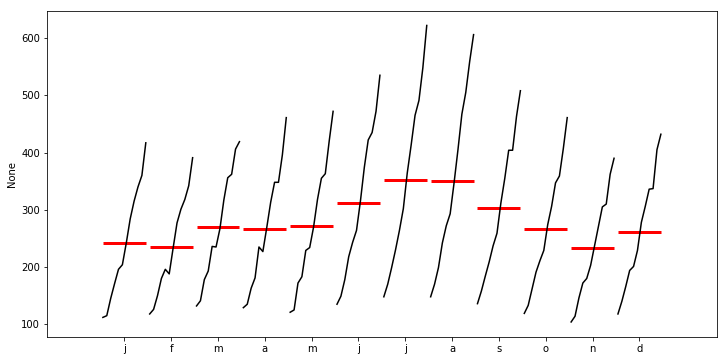

In [227]:
# data already has monthly frequency
month_plot(df1['Thousands of Passengers']);

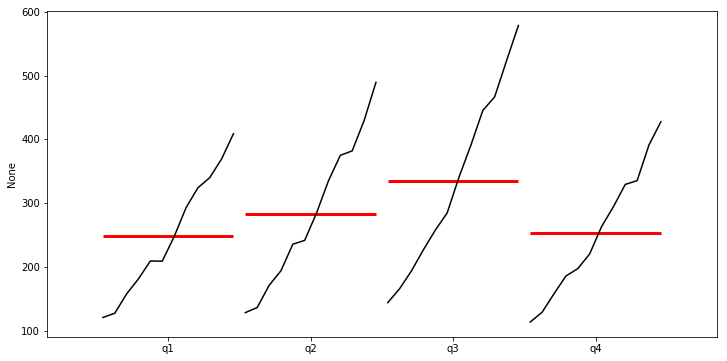

In [229]:
dfq = df1['Thousands of Passengers'].resample('Q').mean()
quarter_plot(dfq); # third quarter == summer peaks in months